In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np  

In [4]:
img1 = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\kopek.jpg")
img2 = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\warning.jpg")

In [5]:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

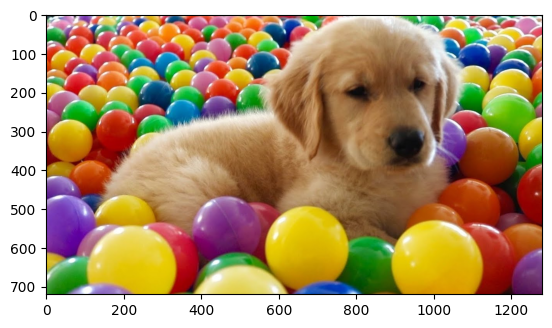

In [6]:
plt.imshow(img1_rgb)

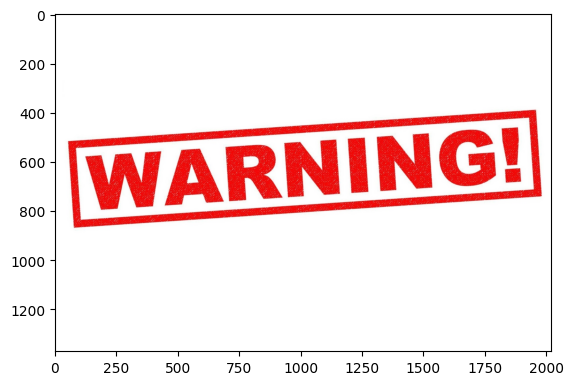

In [7]:
plt.imshow(img2_rgb)

In [8]:
img1_rgb.shape

(720, 1280, 3)

In [9]:
img2_rgb.shape

(1372, 2020, 3)

In [10]:
img1_rgb=cv2.resize(img1_rgb, (1200, 1200))
img2_rgb=cv2.resize(img2_rgb, (1200, 1200))

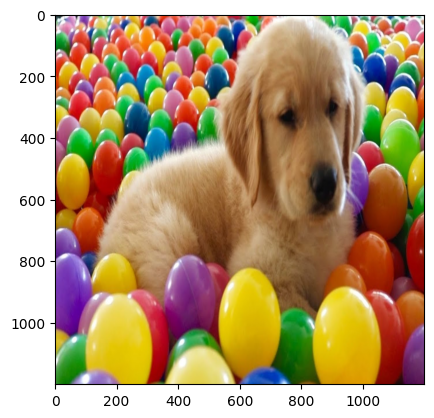

In [11]:
plt.imshow(img1_rgb)

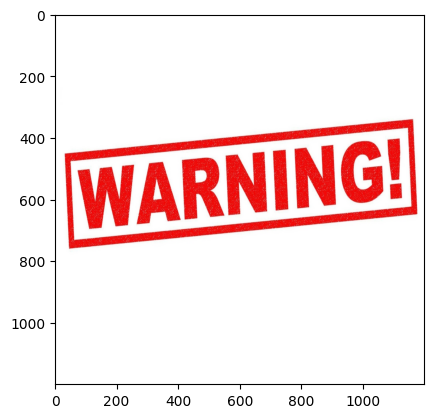

In [12]:
plt.imshow(img2_rgb)

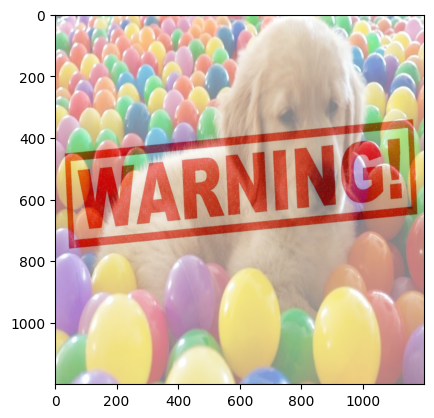

In [13]:
blended = cv2.addWeighted(src1=img1_rgb, alpha=0.5, src2=img2_rgb, beta=0.5, gamma=0) # alpha ve beta değerleri toplamı 1 olmalıdır. alpha ve beta değerleri 0.5 olarak verildiğinde resimlerin %50'si alınır.  # gamma değeri 0 olarak verildiğinde resimlerin %50'si alınır. gamma değeri 0.5 olarak verildiğinde resimlerin %75'i alınır. gamma değeri 1 olarak verildiğinde resimlerin %100'ü alınır. lapha beta resimlerin yoğunluğunu belirtir. gamma ise resimlerin parlaklığını belirtir.
plt.imshow(blended)

YAPIŞTIRMA İŞLEMİ

In [14]:
img1 = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\kopek.jpg")
img2 = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\warning.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2_rgb=cv2.resize(img2_rgb, (600, 600))

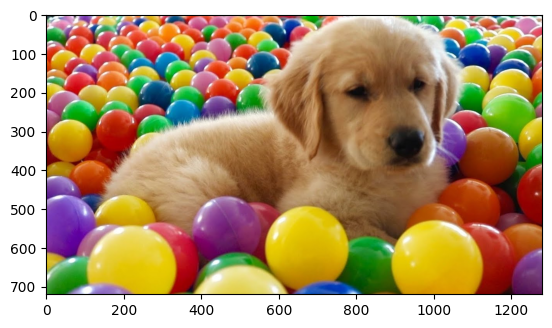

In [15]:
plt.imshow(img1_rgb)

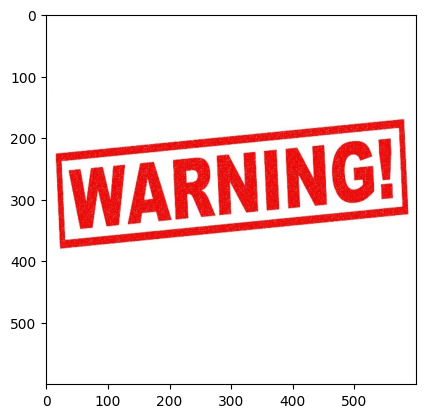

In [16]:
plt.imshow(img2_rgb)

In [17]:
large_img = img1_rgb
small_img = img2_rgb

In [18]:
large_img[0:600, 0:600] = small_img # 0:600 aralığına small_img resmi yerleştirildi. 0:600 = x ekseninde 0'dan 600'e kadar olan kısım, y ekseninde 0'dan 600'e kadar olan kısım.

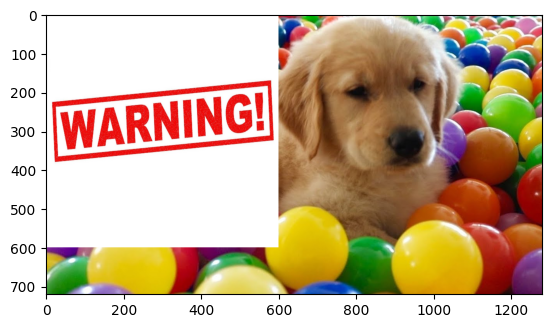

In [19]:
plt.imshow(large_img)

In [20]:
img1 = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\kopek.jpg")
img2 = cv2.imread("C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\warning.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2_rgb=cv2.resize(img2_rgb, (600, 600))

In [21]:
img1_rgb.shape

(720, 1280, 3)

In [22]:
img2_rgb.shape

(600, 600, 3)

In [23]:
roi = img1_rgb[0:720, 600:1280] # 0:720 = y ekseninde 0'dan 720'e kadar olan kısım, x ekseninde 600'den 1800'e kadar olan kısım.

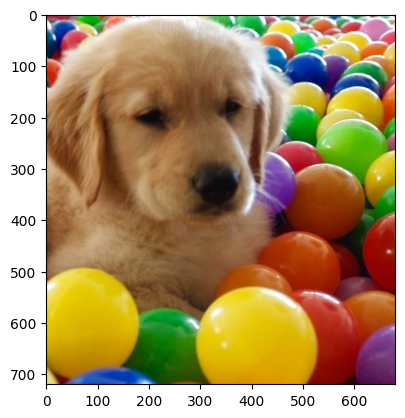

In [24]:
plt.imshow(roi)

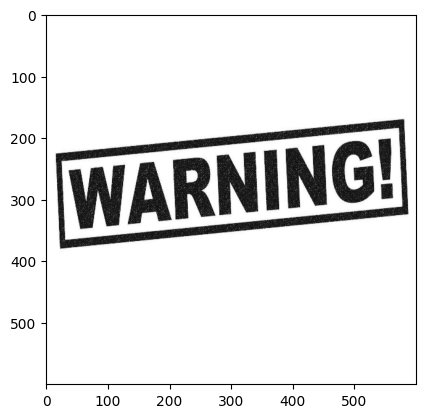

In [25]:
img2gray = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap="gray")

MASKELEME BİTWİSE_NOT FUNC

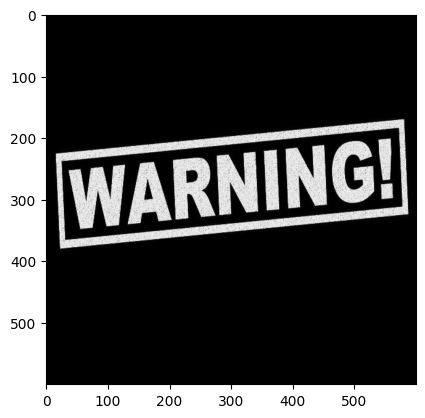

In [26]:
mask_invert= cv2.bitwise_not(img2gray) # mask_invert = img2gray'in tersi alındı. siyah beyaz resimde beyaz olan kısımlar siyah, siyah olan kısımlar beyaz oldu.
plt.imshow(mask_invert, cmap="gray")

In [27]:
mask_invert.shape

(600, 600)

In [29]:
white_background = np.full((600,600,3), 255, dtype=np.uint8)  # 600,600,3 = 600x600 boyutunda 3 kanallı bir matris oluşturuldu. 255 = matrisin tüm elemanları 255 değerine eşitlendi. dtype=np.uint8 = matrisin veri tipi uint8 olarak belirlendi. np.full = matrisin tüm elemanları 255 değerine eşitlendi.

In [30]:
white_background.shape

(600, 600, 3)

In [31]:
bk=cv2.bitwise_or(white_background, white_background, mask=mask_invert) # white_background matrisinin tüm elemanları mask_invert matrisinin tüm elemanlarına göre bitwise_or işlemine tabi tutuldu.bitwise_or, piksellerden herhangi birinin 0'dan büyük olması durumunda ön plan (beyaz) olarak kabul edileceği anlamına gelir. Her iki piksel de 0 ise arka plan (siyah) olarak kabul edilir.

In [32]:
bk.shape

(600, 600, 3)

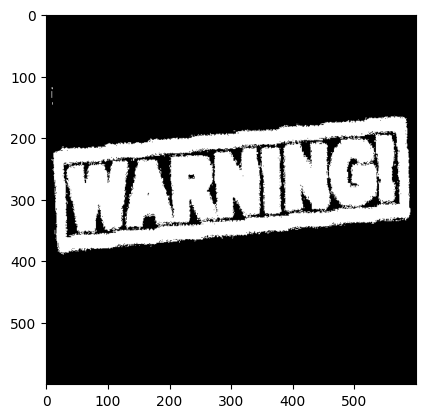

In [33]:
plt.imshow(bk)

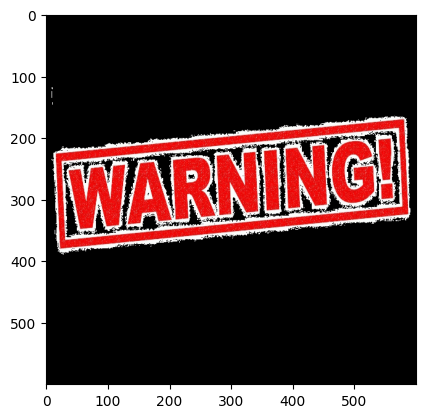

In [34]:
fg=cv2.bitwise_or(img2_rgb, img2_rgb, mask=mask_invert)# img2_rgb matrisinin tüm elemanları mask_invert matrisinin tüm elemanlarına göre bitwise_or işlemine tabi tutuldu.
plt.imshow(fg)

In [36]:
roi=img1_rgb[120:720, 680:1280]

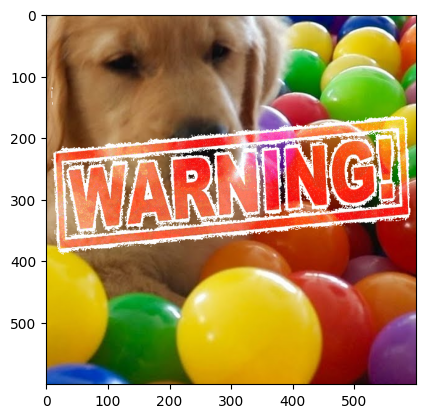

In [37]:
final_roi = cv2.bitwise_or(roi, fg) # roi matrisinin tüm elemanları fg matrisinin tüm elemanlarına göre bitwise_or işlemine tabi tutuldu.
plt.imshow(final_roi) # fotların boyutu aynı olmalı

In [39]:
large_img = img1_rgb
small_img = final_roi

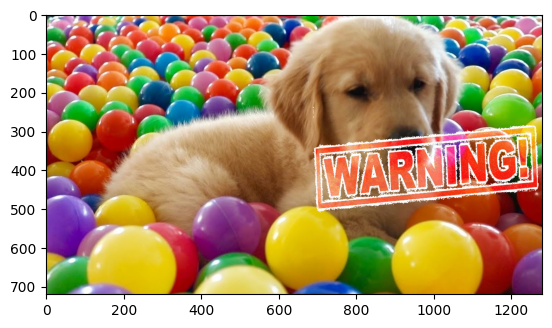

In [40]:
large_img[120:720, 680:1280] = small_img # 120:720 = y ekseninde 120'den 720'e kadar olan kısım, x ekseninde 680'den 1280'e kadar olan kısım.
plt.imshow(large_img)